In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
# Merge two dataframes using an outer join
merge_table = pd.merge(city_data, ride_data, on="city", how="outer")

# Display the data table for preview
merge_table.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

In [3]:
#Total Number of Rides Per City (?)
Rides = merge_table.groupby("city")["fare"].nunique()
Rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: fare, dtype: int64

In [4]:
#Average Fare
CityType = merge_table.groupby("city")
AvgFare = CityType["fare"].mean()
AvgFare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [5]:
#Total Number of drivers per city
Driver = merge_table.groupby("city")
CityDriver = Driver["driver_count"].sum()/Rides
CityDriver.head()


city
Amandaburgh      12.0
Barajasview      26.0
Barronchester    11.0
Bethanyland      22.0
Bradshawfurt      7.0
dtype: float64

In [6]:
# Gotta do a city type
Type = city_data.set_index('city')['type']
Type.head()
#took me forever to figure this out and find out how to do this
#not sure I could do it if the city_data had duplicates

city
Richardfort     Urban
Williamsstad    Urban
Port Angela     Urban
Rodneyfort      Urban
West Robert     Urban
Name: type, dtype: object

In [7]:
#have to group all the data into one data frame
#again, this took way longer than it should have for me figure out
AllCityInfo = city_info = pd.DataFrame({
    "Number of Rides": Rides,
    "Average Fare": AvgFare,
    "Number of Drivers": CityDriver,
    "Type of City": Type})
AllCityInfo.head()

,Number of Rides,Average Fare,Number of Drivers,Type of City
Amandaburgh,18,24.641667,12.0,Urban
Barajasview,22,25.332273,26.0,Urban
Barronchester,16,36.422500,11.0,Suburban
Bethanyland,18,32.956111,22.0,Suburban
Bradshawfurt,10,40.064000,7.0,Rural


In [8]:
#Now break it all apart by Type of City
#Probably could have started here, but I didn't psuedocode as much as I should have
RuralInfo = AllCityInfo[AllCityInfo["Type of City"] == "Rural"]
RuralInfo.head()

,Number of Rides,Average Fare,Number of Drivers,Type of City
Bradshawfurt,10,40.064000,7.0,Rural
Garzaport,3,24.123333,7.0,Rural
Harringtonfort,6,33.470000,4.0,Rural
Jessicaport,6,36.013333,1.0,Rural
Lake Jamie,6,34.358333,4.0,Rural


In [9]:
SuburbanInfo = AllCityInfo[AllCityInfo["Type of City"] == "Suburban"]
SuburbanInfo.head()

,Number of Rides,Average Fare,Number of Drivers,Type of City
Barronchester,16,36.422500,11.0,Suburban
Bethanyland,18,32.956111,22.0,Suburban
Brandonfort,19,35.437368,10.0,Suburban
Colemanland,22,30.894545,23.0,Suburban
Davidfurt,17,31.995882,23.0,Suburban


In [10]:
UrbanInfo = AllCityInfo[AllCityInfo["Type of City"] == "Urban"]
UrbanInfo.head()

,Number of Rides,Average Fare,Number of Drivers,Type of City
Amandaburgh,18,24.641667,12.0,Urban
Barajasview,22,25.332273,26.0,Urban
Carriemouth,27,28.314444,52.0,Urban
Christopherfurt,27,24.501852,41.0,Urban
Deanville,19,25.842632,49.0,Urban


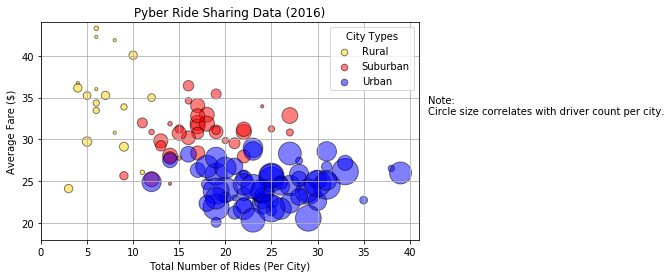

In [11]:
# Build the scatter plots for each city types
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


RuralPlot = plt.scatter(RuralInfo["Number of Rides"], RuralInfo["Average Fare"], s = RuralInfo["Number of Drivers"]*10, color = "gold", edgecolor = 'black', label = 'Rural', alpha = 0.5)
SuburbanPlot = plt.scatter(SuburbanInfo["Number of Rides"], SuburbanInfo["Average Fare"], s = SuburbanInfo["Number of Drivers"]*10, color = "red", edgecolor = 'black', label = 'Suburban', alpha = 0.5)
UrbanPlot = plt.scatter(UrbanInfo["Number of Rides"], UrbanInfo["Average Fare"], s = UrbanInfo["Number of Drivers"]*10, color = "blue", edgecolor = 'black', label = 'Urban', alpha = 0.5)
# Incorporate a text label regarding circle size - that the *10 - Pele's #

#This was actually the first time I could decipher something on Stack Overflow
#I'm not 100% sure on what all of means, like the right = 1, I get the right, but am not sure on the one
#The xample had 0.25, but that made my graph supertiny, so I kept trying numbers until it looked good
textstr = "Note:\nCircle size correlates with driver count per city." 
plt.xlim(0, 41)
plt.ylim(18, 44)
plt.text(42, 33, textstr, fontsize=10)
plt.subplots_adjust(right=1)

# Create a legend
#took me forever to figure out how to pull this right and it's still a little off - the unemployment on day 2 helped
legend = plt.legend(handles=[RuralPlot, SuburbanPlot, UrbanPlot], title = "City Types",  loc="best")
legend.legendHandles[0]._sizes = [44]
legend.legendHandles[1]._sizes = [44]
legend.legendHandles[2]._sizes = [44]

#This is stupid, but it took me a while to find this simple grid function
plt.grid(True)

plt.show()


In [12]:
# Save Figure
#plt.savefig("../data/ridesharebubble.png")


In [13]:
# Show plot
plt.show()

## Total Fares by City Type

In [14]:
# Calculate Type Percents
CityType2 = merge_table.groupby("type")
CityType2.count()





,city,driver_count,date,fare,ride_id
type,,,,,
Rural,125,125,125,125,125
Suburban,625,625,625,625,625
Urban,1625,1625,1625,1625,1625


In [15]:
CityRides = merge_table["fare"].sum()
CityRides

63538.64

In [16]:
TotalFares = CityType2["fare"].sum()
TotalFares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [17]:
CityRides = merge_table["fare"].sum()
CityRides

63538.64

In [18]:
#Percent of Fares by Type
RuralFares = (TotalFares["Rural"] / CityRides)*100
RuralFares

6.811492974983412

In [19]:
SuburbanFares = (TotalFares["Suburban"] / CityRides)*100
SuburbanFares

30.46387206273221

In [20]:
UrbanFares = (TotalFares["Urban"] / CityRides)*100
UrbanFares

62.72463496228436

In [21]:
summary_tablefares = pd.DataFrame({"Percentage of Fares": [RuralFares, SuburbanFares, UrbanFares]})
summary_tablefares = summary_tablefares[summary_tablefares.columns[0]]
summary_tablefares

0     6.811493
1    30.463872
2    62.724635
Name: Percentage of Fares, dtype: float64

(-1.116703108059631,
 1.197266450606346,
 -1.1123788383456472,
 1.1610996829807194)

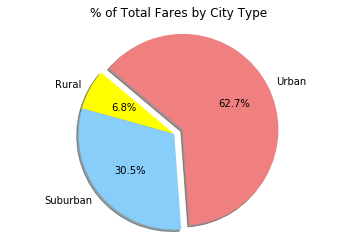

In [22]:
# Build Pie Chart
# Tell matplotlib to create a pie chart based upon the above data
labels = ["Rural", "Suburban", "Urban"]
colors = ["yellow","lightskyblue","lightcoral"]
explode = (0,0,0.1,)
plt.pie(summary_tablefares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True,  startangle=140)
# Create axes which are equal so we have a perfect circle
plt.title("% of Total Fares by City Type")

plt.axis("equal")

In [23]:
# Save Figure
#plt.savefig("../data/ridesharefare.png")

In [24]:
# Show Figure
plt.show()

## Total Rides by City Type

In [25]:
# Calculate Ride Percents
RidesbyCity = merge_table.groupby("type")["city"].value_counts()
RidesbyCity

type      city               
Rural     Michaelberg            12
          Lake Latoyabury        11
          Bradshawfurt           10
          North Holly             9
          West Heather            9
          North Jaime             8
          South Marychester       8
          South Jennifer          7
          Harringtonfort          6
          Jessicaport             6
          Lake Jamie              6
          New Ryantown            6
          Taylorhaven             6
          Penaborough             5
          Randallchester          5
          Newtonview              4
          South Saramouth         4
          Garzaport               3
Suburban  East Marymouth         27
          Josephside             27
          Lake Robertside        25
          South Brenda           24
          Colemanland            22
          New Raymond            22
          South Teresa           22
          West Hannah            21
          West Kimmouth          2

In [26]:
TotalRides = RidesbyCity.sum()
TotalRides

2375

In [27]:
RuralRides = (RidesbyCity["Rural"] / TotalRides)*100
RuralRides.head()

city
Michaelberg        0.505263
Lake Latoyabury    0.463158
Bradshawfurt       0.421053
North Holly        0.378947
West Heather       0.378947
Name: city, dtype: float64

In [28]:
SuburbanRides = (RidesbyCity["Suburban"] / TotalRides)*100
SuburbanRides.head()

city
East Marymouth     1.136842
Josephside         1.136842
Lake Robertside    1.052632
South Brenda       1.010526
Colemanland        0.926316
Name: city, dtype: float64

In [29]:
UrbanRides = (RidesbyCity["Urban"] / TotalRides)*100
UrbanRides.head()

city
West Angela        1.642105
South Karenland    1.600000
North Jason        1.473684
Liumouth           1.389474
Port Frank         1.389474
Name: city, dtype: float64

In [30]:
TotRuralRides = RuralRides.sum()
TotRuralRides

5.263157894736842

In [31]:
TotSuburbanRides = SuburbanRides.sum()
TotSuburbanRides

26.315789473684212

In [32]:
TotUrbanRides = UrbanRides.sum()
TotUrbanRides

68.42105263157895

In [33]:
summary_tablerides = pd.DataFrame({"Percentage of Rides by City Type": [TotRuralRides, TotSuburbanRides, TotUrbanRides]})
summary_tablerides = summary_tablerides[summary_tablerides.columns[0]]
summary_tablerides

0     5.263158
1    26.315789
2    68.421053
Name: Percentage of Rides by City Type, dtype: float64

(-1.1110420108142822,
 1.215408844786391,
 -1.085782351148256,
 1.1462471637001541)

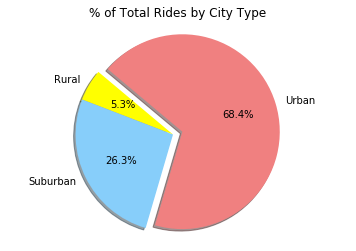

In [34]:
# Build Pie Chart
# Tell matplotlib to create a pie chart based upon the above data
labels = ["Rural", "Suburban", "Urban"]
colors = ["yellow","lightskyblue","lightcoral"]
explode = (0,0,0.1)
plt.pie(summary_tablerides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.title("% of Total Rides by City Type")

plt.axis("equal")


In [35]:
# Save Figure
#plt.savefig("../data/ridesharetotrides.png")

In [36]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [37]:
# Calculate Driver Percents
TotalDrivers = city_data["driver_count"].sum()
TotalDrivers

2973

In [38]:
RuralDrivers = city_data.loc[city_data["type"]=="Rural"]["driver_count"].sum()
RuralDrivers

78

In [39]:
SuburbanDrivers = city_data.loc[city_data['type']=='Suburban']["driver_count"].sum()
SuburbanDrivers

490

In [40]:
UrbanDrivers = city_data.loc[city_data['type']=='Urban']["driver_count"].sum()
UrbanDrivers

2405

In [41]:
RuralDriversPer = (RuralDrivers/TotalDrivers)*100
RuralDriversPer

2.6236125126135215

In [42]:
SuburbanDriversPer =(SuburbanDrivers/TotalDrivers)*100
SuburbanDriversPer

16.481668348469558

In [43]:
UrbanDriversPer = (UrbanDrivers/TotalDrivers)*100
UrbanDriversPer

80.89471913891691

In [44]:
# Build Pie Charts
summary_tabledrivers = pd.DataFrame({"Percent of Drivers by City Type": [RuralDriversPer, SuburbanDriversPer, UrbanDriversPer]})
summary_tabledrivers = summary_tabledrivers[summary_tabledrivers.columns[0]]
summary_tabledrivers

0     2.623613
1    16.481668
2    80.894719
Name: Percent of Drivers by City Type, dtype: float64

(-1.1079533131331436,
 1.210488336220195,
 -1.1158855877672291,
 1.0960571177251688)

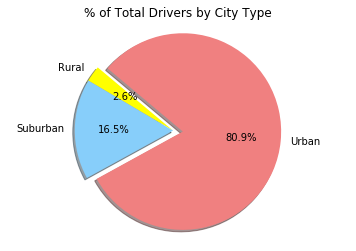

In [45]:
# Build Pie Chart
# SAME AS ABOVE, SO PAY ATTENTION TO ERRORS
# Tell matplotlib to create a pie chart based upon the above data
labels = ["Rural", "Suburban", "Urban"]
colors = ["yellow","lightskyblue","lightcoral"]
explode = (0,0,0.1)
plt.pie(summary_tabledrivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle

plt.title("% of Total Drivers by City Type")
plt.axis("equal")

In [46]:
# Save Figure
#plt.savefig("../data/ridesharetotdrive.png")

In [47]:
# Show Figure
plt.show()